<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-steps-with-LuxAI" data-toc-modified-id="First-steps-with-LuxAI-1">First steps with LuxAI</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Simple-game" data-toc-modified-id="Simple-game-1.2">Simple game</a></span></li><li><span><a href="#Smaller-board-game" data-toc-modified-id="Smaller-board-game-1.3">Smaller board game</a></span></li><li><span><a href="#Exploring-game-configuration" data-toc-modified-id="Exploring-game-configuration-1.4">Exploring game configuration</a></span></li><li><span><a href="#Study-game-info" data-toc-modified-id="Study-game-info-1.5">Study game info</a></span><ul class="toc-item"><li><span><a href="#Actions" data-toc-modified-id="Actions-1.5.1">Actions</a></span></li><li><span><a href="#Board-state" data-toc-modified-id="Board-state-1.5.2">Board state</a></span></li></ul></li><li><span><a href="#Parser" data-toc-modified-id="Parser-1.6">Parser</a></span></li><li><span><a href="#Simple-agent-on-a-function" data-toc-modified-id="Simple-agent-on-a-function-1.7">Simple agent on a function</a></span></li><li><span><a href="#Collision-between-players" data-toc-modified-id="Collision-between-players-1.8">Collision between players</a></span><ul class="toc-item"><li><span><a href="#Naive-collisions" data-toc-modified-id="Naive-collisions-1.8.1">Naive collisions</a></span></li><li><span><a href="#Units-moving-to-the-same-cell-at-the-same-time" data-toc-modified-id="Units-moving-to-the-same-cell-at-the-same-time-1.8.2">Units moving to the same cell at the same time</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-1.9">Annotations</a></span></li><li><span><a href="#Rendering-games" data-toc-modified-id="Rendering-games-1.10">Rendering games</a></span><ul class="toc-item"><li><span><a href="#Simple-way:-use-ipython-rendering" data-toc-modified-id="Simple-way:-use-ipython-rendering-1.10.1">Simple way: use ipython rendering</a></span></li><li><span><a href="#Better-visualization-when-saving-to-html" data-toc-modified-id="Better-visualization-when-saving-to-html-1.10.2">Better visualization when saving to html</a></span></li></ul></li><li><span><a href="#Metrics-from-the-match" data-toc-modified-id="Metrics-from-the-match-1.11">Metrics from the match</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.12">Summary</a></span></li></ul></li></ul></div>

# First steps with LuxAI

## Imports

In [1]:
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from kaggle_environments import make
from functools import partial

Loading environment football failed: No module named 'gfootball'


In [2]:
from kaggle_environments.envs.lux_ai_2021.test_agents.python.lux.game import Game
from kaggle_environments.envs.lux_ai_2021.test_agents.python.lux.game_map import Cell, RESOURCE_TYPES
from kaggle_environments.envs.lux_ai_2021.test_agents.python.lux.constants import Constants
from kaggle_environments.envs.lux_ai_2021.test_agents.python.lux.game_constants import GAME_CONSTANTS
from kaggle_environments.envs.lux_ai_2021.test_agents.python.lux import annotate

In [3]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (20, 5)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## Simple game

In [2]:
env = make("lux_ai_2021", configuration={"seed": 562124210, "loglevel": 0}, debug=True)

In [3]:
initial_info = env.reset()

In [4]:
game_info = env.run(["simple_agent", "simple_agent"])

Quite slow to run a very simple game. Let's see if we set debug to False if we can get faster playing.

In [21]:
env = make("lux_ai_2021", configuration={"seed": 562124210, "loglevel": 0}, debug=False)
initial_info = env.reset()

In [22]:
game_info = env.run(["simple_agent", "simple_agent"])

Even slower.

## Smaller board game

In [20]:
env = make("lux_ai_2021")
[env.reset()[0]['observation']['width'] for _ in range(10)]

[32, 32, 32, 32, 32, 32, 32, 32, 32, 32]

It seems that by default the size is 32.

In [26]:
env = make("lux_ai_2021", debug=False, configuration={'width': 16, 'height': 16})
[env.reset()[0]['observation']['width'] for _ in range(10)]

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16]

We can change that on the configuration when creating the environment. Let's see more parameters that can be found on the configuration.

## Exploring game configuration

In [43]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12})
env.configuration

{'width': 12,
 'height': 12,
 'episodeSteps': 361,
 'actTimeout': 3,
 'runTimeout': 1200,
 'mapType': 'random',
 'annotations': False,
 'loglevel': 0,
 'seed': 751269832}

In [44]:
env = make("lux_ai_2021", debug=False, configuration={'width': 16, 'height': 16})
env.configuration

{'width': 16,
 'height': 16,
 'episodeSteps': 361,
 'actTimeout': 3,
 'runTimeout': 1200,
 'mapType': 'random',
 'annotations': False,
 'loglevel': 0,
 'seed': 707289808}

I have visualized that reseting the game does not change the map, we should change the seed to do that.

## Study game info

Now let's see which information is provided by the game for playing.

In [57]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12})
initial_info = env.reset()
game_info = env.run(["simple_agent", "simple_agent"])

### Actions

In [60]:
game_info[1][1]

{'action': ['m u_2 n'],
 'reward': 10001,
 'info': {},
 'observation': {'remainingOverageTime': 60, 'reward': 10001, 'player': 1},
 'status': 'ACTIVE'}

In [65]:
[step_info[1]['action'] for step_info in game_info[:20]]

[[],
 ['m u_2 n'],
 [],
 ['m u_2 c'],
 ['m u_2 s'],
 ['m u_2 n'],
 [],
 ['m u_2 c'],
 ['m u_2 s'],
 ['m u_2 n'],
 [],
 ['m u_2 c'],
 ['m u_2 s'],
 ['m u_2 n'],
 [],
 ['m u_2 c'],
 ['m u_2 s'],
 ['m u_2 n'],
 [],
 ['m u_2 c']]

In [68]:
[step_info[0]['action'] for step_info in game_info[:20]]

[[],
 ['m u_1 n'],
 [],
 ['m u_1 c'],
 ['m u_1 s'],
 ['m u_1 n'],
 [],
 ['m u_1 c'],
 ['m u_1 s'],
 ['m u_1 n'],
 [],
 ['m u_1 c'],
 ['m u_1 s'],
 ['m u_1 n'],
 [],
 ['m u_1 c'],
 ['m u_1 s'],
 ['m u_1 n'],
 [],
 ['m u_1 c']]

It seems that it simply gives the order move to the unit u_2 and the direction of the movement. In the forum I can see that multiple actions can be given as a list: `{"action": ["r 21 6", "m u_1 w"]` or `"action": ["r 14 5", "bcity u_7", "m u_87 w", "m u_107 w", "m u_109 s", "m u_112 w"]`

### Board state

In [69]:
game_info[1][0]['observation']

{'remainingOverageTime': 60,
 'step': 1,
 'width': 12,
 'height': 12,
 'reward': 10001,
 'globalUnitIDCount': 2,
 'globalCityIDCount': 2,
 'player': 0,
 'updates': ['rp 0 0',
  'rp 1 0',
  'r wood 0 1 354',
  'r wood 0 2 357',
  'r wood 0 3 328',
  'r wood 0 4 331',
  'r wood 0 5 385',
  'r uranium 0 9 315',
  'r wood 1 2 337',
  'r wood 1 3 324',
  'r wood 1 4 316',
  'r coal 1 10 351',
  'r coal 1 11 350',
  'r wood 2 1 780',
  'r wood 2 2 800',
  'r wood 2 3 367',
  'r coal 2 11 390',
  'r wood 3 1 780',
  'r wood 8 1 780',
  'r wood 9 1 780',
  'r wood 9 2 800',
  'r wood 9 3 367',
  'r coal 9 11 390',
  'r wood 10 2 337',
  'r wood 10 3 324',
  'r wood 10 4 316',
  'r coal 10 10 351',
  'r coal 10 11 350',
  'r wood 11 1 354',
  'r wood 11 2 357',
  'r wood 11 3 328',
  'r wood 11 4 331',
  'r wood 11 5 385',
  'r uranium 11 9 315',
  'u 0 0 u_1 3 1 1 40 0 0',
  'u 0 1 u_2 8 1 1 40 0 0',
  'c 0 c_1 0 30',
  'c 1 c_2 0 30',
  'ct 0 c_1 3 2 0',
  'ct 1 c_2 8 2 0',
  'ccd 3 2 6',
  '

In [70]:
game_info[2][0]['observation']

{'remainingOverageTime': 60,
 'step': 2,
 'width': 12,
 'height': 12,
 'reward': 10001,
 'globalUnitIDCount': 2,
 'globalCityIDCount': 2,
 'player': 0,
 'updates': ['rp 0 0',
  'rp 1 0',
  'r wood 0 1 358',
  'r wood 0 2 361',
  'r wood 0 3 332',
  'r wood 0 4 335',
  'r wood 0 5 389',
  'r uranium 0 9 315',
  'r wood 1 2 341',
  'r wood 1 3 328',
  'r wood 1 4 320',
  'r coal 1 10 351',
  'r coal 1 11 350',
  'r wood 2 1 760',
  'r wood 2 2 800',
  'r wood 2 3 371',
  'r coal 2 11 390',
  'r wood 3 1 760',
  'r wood 8 1 760',
  'r wood 9 1 760',
  'r wood 9 2 800',
  'r wood 9 3 371',
  'r coal 9 11 390',
  'r wood 10 2 341',
  'r wood 10 3 328',
  'r wood 10 4 320',
  'r coal 10 10 351',
  'r coal 10 11 350',
  'r wood 11 1 358',
  'r wood 11 2 361',
  'r wood 11 3 332',
  'r wood 11 4 335',
  'r wood 11 5 389',
  'r uranium 11 9 315',
  'u 0 0 u_1 3 1 0 80 0 0',
  'u 0 1 u_2 8 1 0 80 0 0',
  'c 0 c_1 0 30',
  'c 1 c_2 0 30',
  'ct 0 c_1 3 2 0',
  'ct 1 c_2 8 2 0',
  'ccd 3 2 6',
  '

There seems to be a parser that probably would be useful both for reading board state and for giving actions.

## Parser

I'm looking at this sample to use the parser: https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/lux_ai_2021/test_agents/python/simple_agent.py

In [4]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12, 'seed': 0})
initial_info = env.reset()
game_info = env.run(["simple_agent", "js_simple_agent"])

In [5]:
game_state = Game()
game_state._initialize(game_info[0][0]['observation']['updates'])
game_state._update(game_info[0][0]['observation']['updates'][2:])

Documentation for this objects can be found here. https://github.com/Lux-AI-Challenge/Lux-Design-2021/tree/master/kits

![](https://raw.githubusercontent.com/Lux-AI-Challenge/Lux-Design-2021/master/assets/game_board.png)

In the representation the square is rotated 45º. X dimension is on WE axis and Y dimension is on NS axis.

- Increasing x means moving east
- Increasing y means moving south

We can represent that in a image with y on heigh and x on width. For python convention y will use the first axis.

In [11]:
resource_matrix = np.zeros((game_state.map_width, game_state.map_height), dtype=int)
for x in range(game_state.map_width):
    for y in range(game_state.map_height):
        cell = game_state.map.get_cell(x, y)
        resource_matrix[y, x] = cell.has_resource()

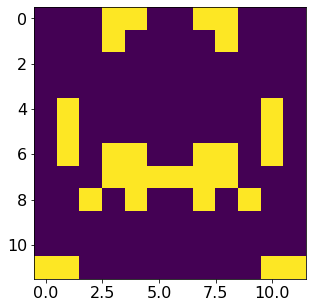

In [14]:
plt.imshow(resource_matrix, origin='upper');

If we rotate the image 45º we get the same view as below.

In [ ]:
env.render(mode="ipython", width=600, height=600)

Let's give color to the resource.

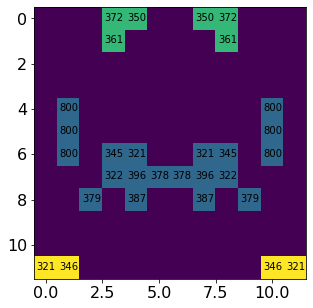

In [32]:
resource_to_color = dict(wood=1, coal=2, uranium=3)

resource_matrix = np.zeros((game_state.map_width, game_state.map_height), dtype=int)
for x in range(game_state.map_width):
    for y in range(game_state.map_height):
        cell = game_state.map.get_cell(x, y)
        if cell.has_resource():
            resource_matrix[y, x] = resource_to_color[cell.resource.type]
            plt.text(x-0.4, y+0.1, str(cell.resource.amount), fontdict=dict(size=10))
plt.imshow(resource_matrix, origin='upper');

## Simple agent on a function

Let's try to use a function as input to the environment. I will be using the simple agent function

In [34]:
from kaggle_environments.envs.lux_ai_2021.test_agents.python.simple_agent import agent as simple_agent

In [35]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12, 'seed': 0})
initial_info = env.reset()
game_info = env.run(["simple_agent", simple_agent])

In [ ]:
env.render(mode="ipython", width=800, height=800)

Nice, so we can start over that agent and see the challenges when creating new agents.

## Collision between players

Let's make an agent that always moves south and another that always move north and see what happens.

### Naive collisions

In [5]:
class BaseAgent():
    def __init__(self):
        self.game_state = None
        
    def _update_game_state(self, observation):
        if observation["step"] == 0:
            self.game_state = Game()
            self.game_state._initialize(observation["updates"])
            self.game_state._update(observation["updates"][2:])
            self.game_state.id = observation.player
        else:
            self.game_state._update(observation["updates"])
        
    def __call__(self, observation, configuration):
        self._update_game_state(observation)
        raise NotImplementedError('You have to implement this function')

In [6]:
class MoveAgent(BaseAgent):
    def __init__(self, move_dir, move_n_times=np.inf):
        super().__init__()
        self.move_dir = move_dir
        self.move_n_times = move_n_times
        self.n_moves = 0
        
    def __call__(self, observation, configuration):
        self._update_game_state(observation)
        actions = []
        player = self.game_state.players[observation.player]
        for unit in player.units:
            if unit.is_worker() and unit.can_act() and self.n_moves < self.move_n_times:
                actions.append(unit.move(self.move_dir))
                self.n_moves += 1
        return actions

In [36]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12, 'seed': 0})
initial_info = env.reset()
game_info = env.run([MoveAgent('e'), MoveAgent('w')])

In this case they simply cross. The board is symmetric and they swap positions. Let's see what happens if one moves and the other stays the same.

In [38]:
initial_info = env.reset()
game_info = env.run([MoveAgent('e'), MoveAgent('w', 1)])

In this case the agent cannot move to that position, there is a collision.

In [ ]:
env.render(mode="ipython", width=800, height=800)

### Units moving to the same cell at the same time

In [11]:
class MoveAgent(BaseAgent):
    def __init__(self, move_dir, move_n_times=np.inf, start_delay=0):
        super().__init__()
        self.move_dir = move_dir
        self.move_n_times = move_n_times
        self.n_moves = 0
        self.start_delay = start_delay
        
    def __call__(self, observation, configuration):
        self._update_game_state(observation)
        if observation.step < self.start_delay:
            return []
        actions = []
        player = self.game_state.players[observation.player]
        for unit in player.units:
            if unit.is_worker() and unit.can_act() and self.n_moves < self.move_n_times:
                actions.append(unit.move(self.move_dir))
                self.n_moves += 1
        return actions

In [14]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12, 'seed': 0})
initial_info = env.reset()
game_info = env.run([MoveAgent('e'), MoveAgent('w', start_delay=2)])

In this case neither of the units moves to the desired cell because there is a collision. This will likely happen also between units of the same player.

In [ ]:
env.render(mode="ipython", width=800, height=800)

## Annotations

Let's make some anotations just for fun.

In [73]:
def annotation_agent(observation, configuration):
    actions = []
    actions.append(annotate.x(observation.step, 0))
    actions.append(annotate.circle(observation.step+1, observation.step))
    return actions

I had to add a new parameter to configuration to enable annotations.

In [77]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12, 'seed': 0, 'annotations': True})
initial_info = env.reset()
game_info = env.run([MoveAgent('e'), annotation_agent])

This kind of visualizations could be useful to debug the agent.

In [ ]:
env.render(mode="ipython", width=800, height=800)

## Rendering games

### Simple way: use ipython rendering

In [4]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12, 'seed': 0})
initial_info = env.reset()
game_info = env.run(["simple_agent", "js_simple_agent"])

In [ ]:
env.render(mode="ipython", width=1000, height=800)

### Better visualization when saving to html

This visualization is better because it is full tab.

In [18]:
def render_game_in_html(env, filepath=None):
    if filepath is None:
        filepath = tempfile.NamedTemporaryFile(delete=False, suffix='.html').name
    with open(filepath, 'w') as f:
        f.write(env.render(mode='html'))
    os.system('google-chrome "%s"' % os.path.realpath(filepath))

In [19]:
render_game_in_html(env)

Opening in existing browser session.


## Metrics from the match

In [7]:
env = make("lux_ai_2021", debug=False, configuration={'width': 12, 'height': 12, 'seed': 0})
initial_info = env.reset()
game_info = env.run(['simple_agent', MoveAgent('w')])

In [ ]:
env.render(mode="ipython", width=800, height=800)

In [9]:
game_info[-1]

[{'action': ['m u_1 c'],
  'reward': 10001,
  'info': {},
  'observation': {'remainingOverageTime': 60,
   'step': 360,
   'width': 12,
   'height': 12,
   'reward': 10001,
   'globalUnitIDCount': 2,
   'globalCityIDCount': 2,
   'player': 0,
   'updates': ['rp 0 0',
    'rp 1 0',
    'r uranium 0 11 321',
    'r uranium 1 11 346',
    'r wood 2 8 500',
    'r coal 3 0 372',
    'r coal 3 1 361',
    'r wood 3 6 473',
    'r wood 3 7 500',
    'r coal 4 0 350',
    'r wood 4 6 500',
    'r wood 4 7 500',
    'r wood 4 8 500',
    'r wood 5 7 500',
    'r wood 6 7 500',
    'r coal 7 0 350',
    'r wood 7 6 500',
    'r wood 7 7 500',
    'r wood 7 8 500',
    'r coal 8 0 372',
    'r coal 8 1 361',
    'r wood 8 6 500',
    'r wood 8 7 500',
    'r wood 9 8 500',
    'r wood 10 4 800',
    'r wood 10 5 800',
    'r wood 10 6 800',
    'r uranium 10 11 346',
    'r uranium 11 11 321',
    'u 0 0 u_1 3 6 0 96 0 0',
    'u 0 1 u_2 3 5 0 96 0 0',
    'c 0 c_1 800 30',
    'ct 0 c_1 2 5 0',

The game info does not provide much information for getting metrics about the match. Let's try using the parser objects.

In [11]:
game_state = Game()
observation = game_info[0][0]['observation']
game_state._initialize(observation["updates"])
game_state._update(observation["updates"][2:])
[game_state._update(step_info[0]['observation']["updates"]) for step_info in game_info[1:]];

In [19]:
player = game_state.players[0]

In [20]:
player.city_tile_count

1

In [21]:
player.research_points

0

In [28]:
player.cities['c_1'].fuel

800.0

In [30]:
player.cities['c_1'].get_light_upkeep()

30.0

In [26]:
player.units[0].cargo.wood

96

It seems that by using this methods we could get similar metrics to those shown on the match rendering.

## Summary

- The game is pretty slow. It takes around 5 seconds for a 32x32 board and around 2 seconds for 16x16
- The game has this configuration parameters:

```python
{'width': 12,
 'height': 12,
 'episodeSteps': 361,
 'actTimeout': 3,
 'runTimeout': 1200,
 'mapType': 'random',
 'annotations': False,
 'loglevel': 0,
 'seed': 751269832}
```

- Resetting the environment does not change the map, the seed determines the map
- The game board and the actions are encoded with some custom format, but python parsers are provided
  that make easier to deal with the game information. I don't know how efficient this parsers are. We can
  leave that for later if we need to improve speed.
- The python objects are well documented [here](https://github.com/Lux-AI-Challenge/Lux-Design-2021/tree/master/kits)
![](https://raw.githubusercontent.com/Lux-AI-Challenge/Lux-Design-2021/master/assets/game_board.png)
- In the representation the square is rotated 45º. X dimension is on WE axis and Y dimension is on NS axis.
    - Increasing x means moving east
    - Increasing y means moving south
- We can use a function or a class as an agent just like we did on hungry geese challenge
- It is possible to draw circles, lines... that are shown when rendering the match
- The best way to visualize a match is to render to html because the visualization uses the whole tab
- Using the python parser we can probably get the same metrics as the one provided by the rendering of the match.
- It takes around 40 ms to parse a match